# solution for problem statement 1 

1. Dataset Shape: (941, 7)


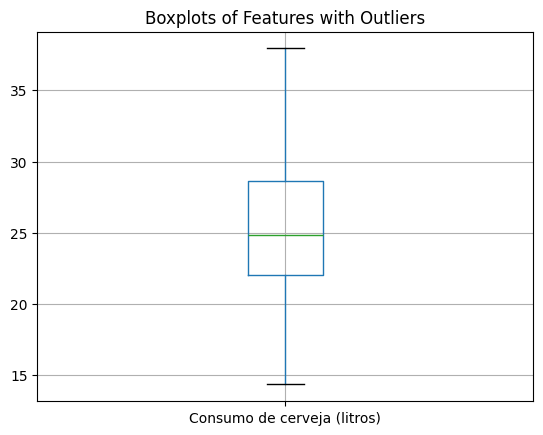

<Figure size 1000x600 with 0 Axes>

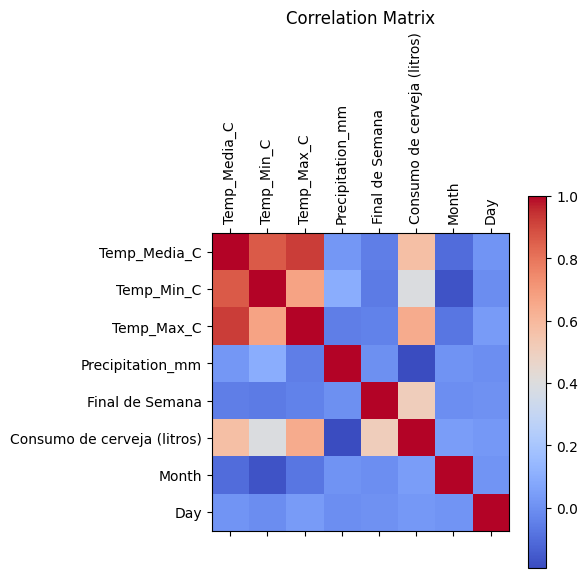

9. Linear Regression Model:
Intercept: 5.003989009263805
Coefficients:
Temp_Media_C: 0.03949764807981753
Temp_Min_C: -0.00019187794466274388
Temp_Max_C: 0.650263753413902
Precipitation_mm: -0.04381015648851036
Final de Semana: 5.232626033731881
Month: 0.14139280581133112
Day: 0.004164937799046175

10. Model Evaluation:
R-squared (R2) Score: 0.7406
Mean Absolute Error (MAE): 1.9870
Root Mean Squared Error (RMSE): 2.3975


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import datetime

# Task 1: Load the dataset and check its shape
df = pd.read_csv("consumo_cerveja.csv")
print("1. Dataset Shape:", df.shape)

# Task 2: Rectify data in the first four columns
df.rename(columns={
    'Temperatura Media (C)': 'Temp_Media_C',
    'Temperatura Minima (C)': 'Temp_Min_C',
    'Temperatura Maxima (C)': 'Temp_Max_C',
    'Precipitacao (mm)': 'Precipitation_mm'
}, inplace=True)

# Task 3: Create new features from the 'Data' column
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')  # Correct the date format
df['Month'] = df['Data'].dt.month
df['Day'] = df['Data'].dt.day
df.set_index('Data', inplace=True)

# Task 4: Handle null and duplicate values
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Task 5: Check and convert data types
df = df.astype({'Final de Semana': int})

# Task 6: Analyze features with outlier values
outlier_features = ['Temp_Media_C', 'Temp_Min_C', 'Temp_Max_C', 'Precipitation_mm', 'Consumo de cerveja (litros)']
df[outlier_features].boxplot()
plt.title('Boxplots of Features with Outliers')
plt.show()

# Replace commas with periods in the entire DataFrame
df = df.replace(',', '.', regex=True)
# Convert columns to float
df = df.astype(float)

# Task 7: Plot and analyze the correlation
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
plt.matshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation='vertical')
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

# Task 8: Split the dataset for training and testing
X = df[['Temp_Media_C', 'Temp_Min_C', 'Temp_Max_C', 'Precipitation_mm', 'Final de Semana', 'Month', 'Day']]
y = df['Consumo de cerveja (litros)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 9: Train a linear regression model and print the intercept and coefficients
model = LinearRegression()
model.fit(X_train, y_train)
print("9. Linear Regression Model:")
print(f"Intercept: {model.intercept_}")
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

# Task 10: Evaluate the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\n10. Model Evaluation:")
print(f"R-squared (R2) Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


# solution for problem statement 2

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Task 1: Load the data, check its shape, and check for null values
data = pd.read_csv('california_housing_train.csv')
print("Dataset Shape:", data.shape)
print("Null Values:\n", data.isnull().sum())

# Task 2: Split the dataset for training and testing (1000 instances for testing)
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=42)

# Task 3: Train the model using sklearn (Apply linear regression to train a model for prediction)
model = LinearRegression()
model.fit(X_train, y_train)

# Task 4: Predict the prices on test data and evaluate the model by r2 score and mean absolute error
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("R-squared Score:", r2)
print("Mean Absolute Error:", mae)

# Task 5: Find coefficient and intercept using the trained model
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Dataset Shape: (17000, 9)
Null Values:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64
R-squared Score: 0.642763394432659
Mean Absolute Error: 52486.71121771103
Coefficients: [-4.32650586e+04 -4.29877050e+04  1.13224456e+03 -8.24971921e+00
  1.15173391e+02 -3.72835206e+01  4.39458716e+01  4.04437504e+04]
Intercept: -3632877.8425118704


# solution for problem statement 3

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Task 1: Load the data, check its shape and check for null values
data = pd.read_csv('insurance.csv')  # Load the dataset
print("Dataset Shape:", data.shape)  # Check the shape
print("Null Values:\n", data.isnull().sum())  # Check for null values

# Task 2: Convert categorical features to numerical values using One-Hot Encoding
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Task 3: Split the dataset for training and testing
X = data.drop('charges', axis=1)  # Features (independent variables)
y = data['charges']  # Target (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 4: Train the model using sklearn (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Task 5: Find the intercept and coefficients from the trained model
intercept = model.intercept_
coefficients = model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Task 6: Predict the prices of test data and evaluate the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)



Dataset Shape: (1338, 7)
Null Values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Intercept: -11931.219050326692
Coefficients: [ 2.56975706e+02  3.37092552e+02  4.25278784e+02 -1.85916916e+01
  2.36511289e+04 -3.70677326e+02 -6.57864297e+02 -8.09799354e+02]
R-squared (R2) Score: 0.7835929767120723
Root Mean Squared Error (RMSE): 5796.2846592762735


# solution for problem statement 4

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Task 1: Load the data, check its shape and check for null values
data = pd.read_csv('50_Startups.csv')  # Load the dataset
print("Dataset Shape:", data.shape)  # Check the shape
print("Null Values:\n", data.isnull().sum())  # Check for null values

# Task 2: Convert categorical features to numerical values using Label Encoder
label_encoder = LabelEncoder()
data['State'] = label_encoder.fit_transform(data['State'])

# Task 3: Split the dataset for training and testing
X = data.drop('Profit', axis=1)  # Features (independent variables)
y = data['Profit']  # Target (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 4: Train the model using sklearn (Linear Regression) and find intercept and coefficients
model = LinearRegression()
model.fit(X_train, y_train)

intercept = model.intercept_
coefficients = model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Task 5: Predict the profits of test data and evaluate the model using r2 score and mean squared error
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared (R2) Score:", r2)
print("Mean Squared Error (MSE):", mse)

# Task 6: Regularize the model using Ridge Regression and find the score
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

ridge_score = ridge_model.score(X_test, y_test)
print("Ridge Regression Score:", ridge_score)

# Task 7: Regularize the model using Lasso Regression and find the score
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

lasso_score = lasso_model.score(X_test, y_test)
print("Lasso Regression Score:", lasso_score)


Dataset Shape: (50, 5)
Null Values:
 R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64
Intercept: 54080.71684611383
Coefficients: [  0.80379465  -0.06791023   0.03126059 -16.82030683]
R-squared (R2) Score: 0.9000614254946406
Mean Squared Error (MSE): 80929465.49097753
Ridge Regression Score: 0.9000615874908106
Lasso Regression Score: 0.9000618249851652
